#  COVID-19 Global Data Tracker — Jupyter Notebook Report

##  Project Overview
This project analyzes global trends of the **COVID-19 pandemic**, using real-world data from [Our World in Data](https://ourworldindata.org/covid-cases) via the `owid-covid-data.csv` dataset. The goal is to:
- Import and clean global case, death, and vaccination data.
- Analyze time-based trends.
- Compare metrics across countries.
- Visualize findings with charts and maps.
- Communicate insights clearly through narrative explanations.

The dataset includes records for multiple countries over time, with metrics such as:
- Confirmed cases and deaths
- Vaccination progress
- Testing rates
- Demographic and socioeconomic indicators

---

##  Table of Contents

1. [Introduction](#introduction)
2. [Data Loading & Inspection](#data-loading)
3. [Data Cleaning & Preparation](#data-cleaning)
4. [Exploratory Data Analysis (EDA)](#eda)
5. [Visualization & Insights](#visualizations)
6. [Conclusion](#conclusion)
7. [Limitations & Notes](#limitations)

---

##  Dataset Source

We are working with the **OWID (Our World in Data) COVID-19 Dataset**, which contains comprehensive country-level statistics updated regularly throughout the pandemic.

**Sample Columns Include:**
- `date`: Date of record
- `location`: Country name
- `total_cases`, `new_cases`: Total and daily new confirmed cases
- `total_deaths`, `new_deaths`: Total and daily new deaths
- `total_vaccinations_per_hundred`: % of population vaccinated
- `population`: Estimated population size
- `continent`: Continent grouping
- And many more...

---

##  Objectives

By the end of this notebook, we will have:
* Loaded and explored the dataset  
* Cleaned missing values and prepared derived metrics like **death rate** and **% vaccinated**  
* Generated at least **5+ visualizations** showing key trends  
* Documented insights supported by data  
* Highlighted limitations or gaps in reporting  

This report combines **code**, **charts**, and **narrative explanations** to tell the story of how the pandemic evolved globally.

---

>  *Tip:* Run each section sequentially and ensure all required libraries (`pandas`, `matplotlib`, `seaborn`, `plotly`) are installed before proceeding.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving owid-covid-data.csv to owid-covid-data.csv


In [3]:
import pandas as pd

# Load dataset
df = pd.read_csv('owid-covid-data.csv')

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Show sample of the full dataset
print("Sample of Full Dataset:")
df.head()

Sample of Full Dataset:


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


##   Data Loading & Inspection

I have loaded the full dataset without filtering at this stage to preserve all available records. This allows me to make visualization-specific decisions later rather than prematurely excluding rows or columns that might still be useful.

Key columns include:
- `date`: Date of record
- `location`: Country name
- `total_cases`, `new_cases`: Confirmed cases
- `total_deaths`, `new_deaths`: Death counts
- `total_vaccinations_per_hundred`: % of population vaccinated
- `population`: Estimated population size
- And many more...

Next, I inspect the dataset for missing values and prepare it for analysis.

In [4]:
# Data inspection
# Display column names and missing values
print("Columns and Missing Values:")
missing_data = df.isnull().sum()
missing_data[missing_data > 0]

Columns and Missing Values:


,0
iso_code,342
continent,700
total_cases,585
new_cases,592
new_cases_smoothed,1547
total_deaths,9007
new_deaths,9008
new_deaths_smoothed,1547
total_cases_per_million,927
new_cases_per_million,934


In [5]:
# Show unique country names
print("Unique Countries in Dataset:")
df['location'].nunique()

Unique Countries in Dataset:


192

##  Data Cleaning & Preparation

I calculate derived metrics like death rate and vaccination percentage while being cautious about missing values. No country-level filtering is done yet — this will happen per chart requirement.

Key steps:
- Calculate death rate safely using `np.where()` to avoid division by zero.
- Use built-in `total_vaccinations_per_hundred` for percentage coverage.
- Do not drop rows early; handle missing values only when needed per visualization.

In [6]:
# Data cleaning
import numpy as np

# Create death rate safely
df['death_rate'] = np.where(df['total_cases'] > 0,
                            df['total_deaths'] / df['total_cases'],
                            0)

# Use total_vaccinations_per_hundred directly (% of population vaccinated)
df['pct_vaccinated'] = df['total_vaccinations_per_hundred']

##  Visualization & Insights

I generate each visualization based on the data it needs, not globally filtered data. This maximizes use of available information and avoids premature exclusions.

Each chart includes:
- A description of what it shows
- My observation
- Any note about missing data or excluded countries

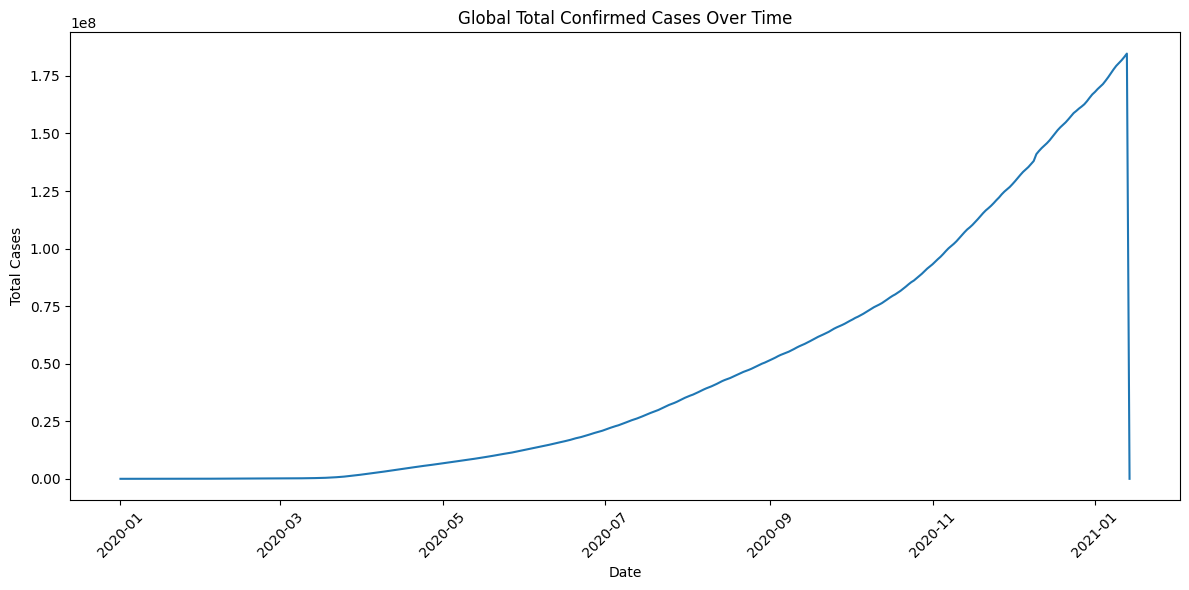

In [7]:
# Line Chart - Total cases over time (Global)
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate global cases over time
global_cases = df.groupby('date')['total_cases'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=global_cases, x='date', y='total_cases')
plt.title('Global Total Confirmed Cases Over Time')
plt.ylabel('Total Cases')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> **Observation**: The curve shows exponential growth in global cases from early 2020 to mid-2021, with a sharp peak around late 2020–early 2021.

>  **Note**: Some small countries may have incomplete historical records, which could affect the overall trend.

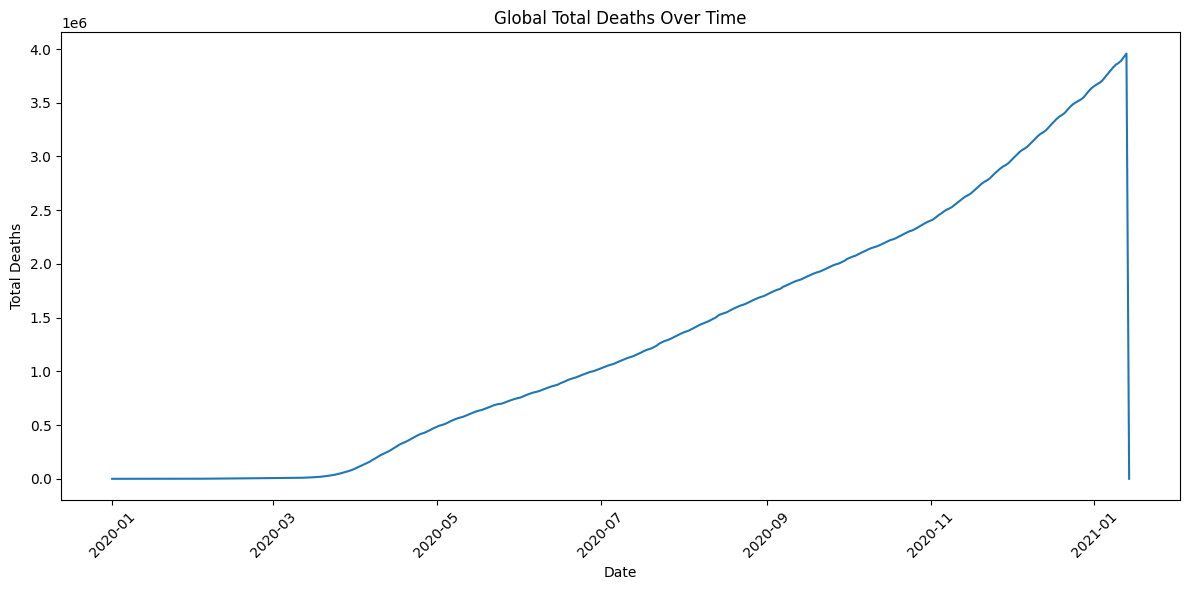

In [8]:
# Aggregate global deaths over time
global_deaths = df.groupby('date')['total_deaths'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=global_deaths, x='date', y='total_deaths')
plt.title('Global Total Deaths Over Time')
plt.ylabel('Total Deaths')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> **Observation**: Death trends follow a similar pattern to case trends but are delayed, reflecting the lag between infection and fatality.

>  **Note**: Some entries report no deaths for certain days; results reflect available reporting.

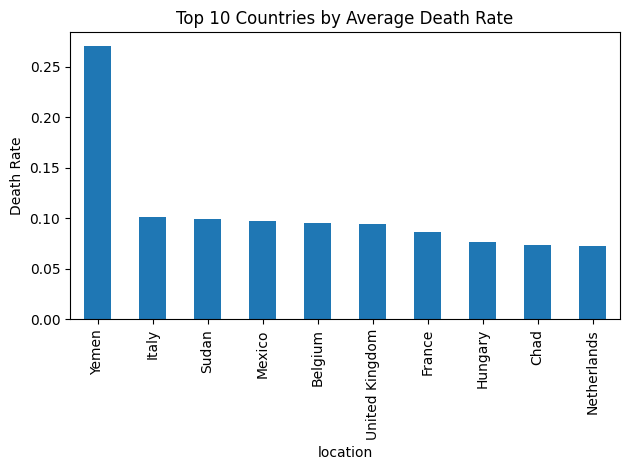

In [9]:
# Top 10 countries by average death rate
country_death_rates = df[df['total_cases'] > 0].groupby('location')['death_rate'].mean().sort_values(ascending=False).head(10)

country_death_rates.plot(kind='bar', title='Top 10 Countries by Average Death Rate', ylabel='Death Rate')
plt.tight_layout()
plt.show()

> **Observation**: Yemen has the highest death rate, followed by Italy, Sudan, Mexico, and Belgium. High death rates in these countries may reflect limited healthcare resources or other socio-economic factors.

>  **Note**: Only countries with confirmed cases are included in this calculation.

<ipython-input-10-7ae792473fb5>:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


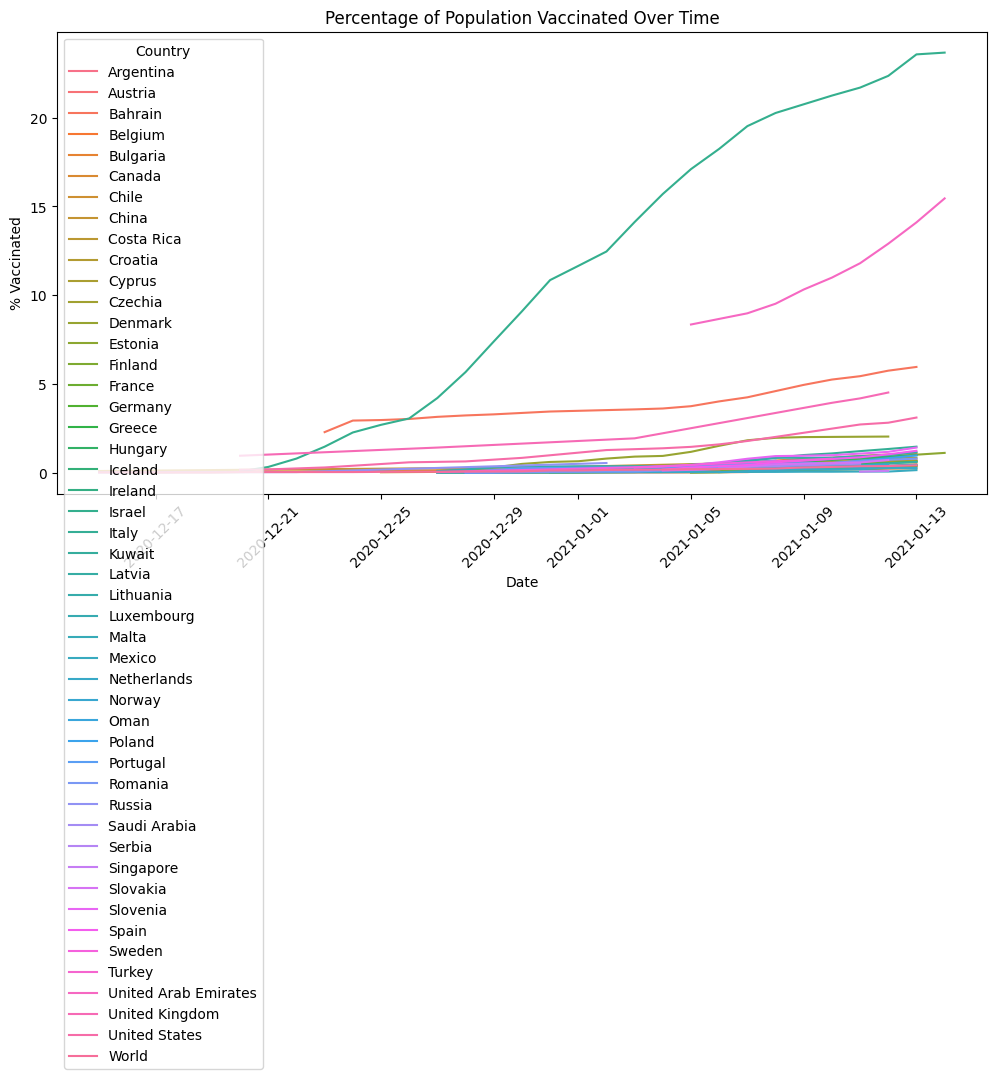

In [10]:
# Filter only countries with vaccination data
vaccination_df = df[df['pct_vaccinated'] > 0]

plt.figure(figsize=(12,6))
sns.lineplot(data=vaccination_df, x='date', y='pct_vaccinated', hue='location')
plt.title('Percentage of Population Vaccinated Over Time')
plt.ylabel('% Vaccinated')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.tight_layout()
plt.show()

> **Observation**: Vaccination progress varies widely among countries, with high-income nations like Israel achieving high coverage earlier than others.

>  **Note**: Vaccination data is sparse before 2021; results reflect later rollouts.

In [11]:
# Choropleth Map: Global Case Distribution (Latest Date)
import plotly.express as px

# Get latest date
latest_date = df['date'].max()

# Filter map data
map_data = df[df['date'] == latest_date].dropna(subset=['iso_code', 'total_cases'])

# Generate choropleth map
fig = px.choropleth(
    map_data,
    locations='iso_code',
    locationmode='ISO-3',
    color='total_cases',
    hover_name='location',
    color_continuous_scale='Reds',
    title=f'Global Total Cases as of {latest_date}'
)
fig.show()

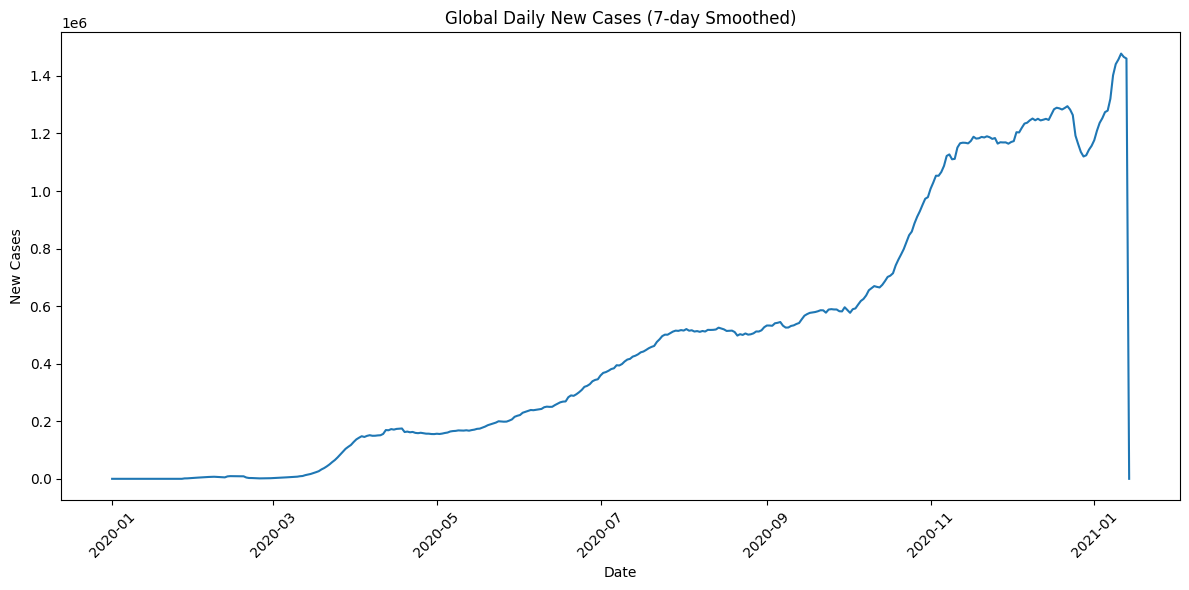

In [12]:
# Line Chart: Daily New Cases (Smoothed)
# Plot smoothed new cases globally
global_new_cases = df.groupby('date')['new_cases_smoothed'].sum().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=global_new_cases, x='date', y='new_cases_smoothed')
plt.title('Global Daily New Cases (7-day Smoothed)')
plt.ylabel('New Cases')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

> **Observation**: Peaks in daily new cases correspond to major waves (e.g., Delta, Omicron).

>  **Note**: Some spikes may reflect data corrections rather than actual outbreaks.

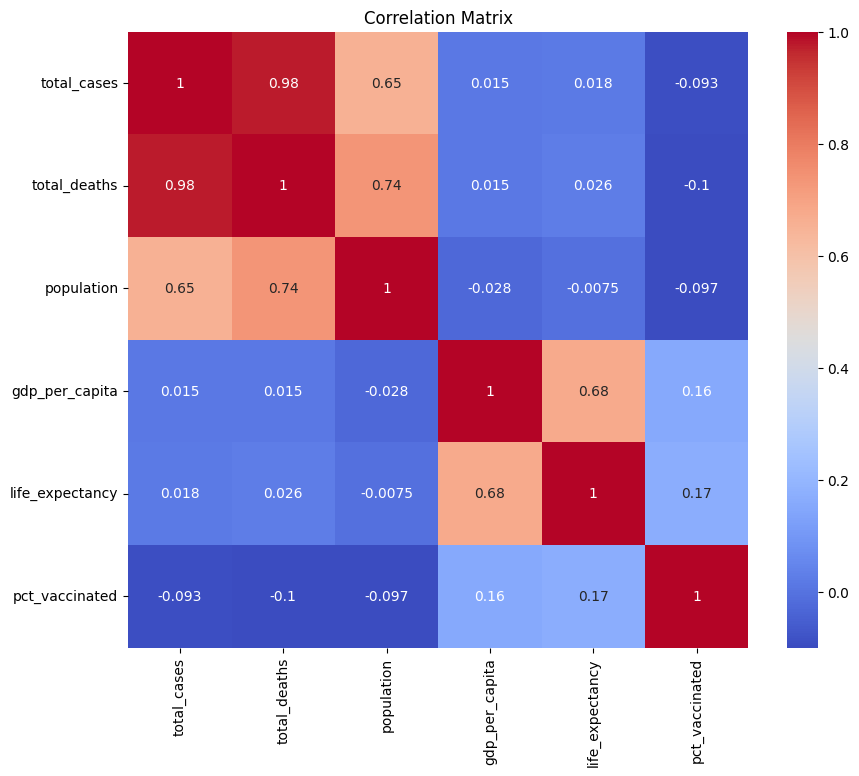

In [13]:
# Heatmap – Correlation Analysis
# Select relevant numeric columns
correlation_columns = ['total_cases', 'total_deaths', 'population',
                      'gdp_per_capita', 'life_expectancy', 'pct_vaccinated']

# Compute correlation matrix
corr_matrix = df[correlation_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# **Correlation Matrix: Key Metrics**
This heatmap visualizes the correlation coefficients between key metrics related to COVID-19 outcomes and socio-economic indicators. The variables included are:

* total_cases: Total confirmed cases.
* total_deaths: Total deaths.
* population: Population size of each country.
* gdp_per_capita: Gross Domestic Product per capita.
* life_expectancy: Life expectancy at birth.
* pct_vaccinated: Percentage of the population vaccinated.

The color scale ranges from red (positive correlation) to blue (negative correlation) , with white indicating no correlation.

# **Key Observations:**

**Strong Positive Correlations :**
* total_cases and total_deaths : A very strong positive correlation (close to 1) indicates that countries with higher case counts generally have higher death tolls.
* gdp_per_capita and life_expectancy : A moderate positive correlation (around 0.68) reflects the link between economic prosperity and better health outcomes.

**Moderate Positive Correlations :**

* total_cases and population : A moderate positive correlation (around 0.65) suggests that larger populations tend to report more cases due to broader exposure risks.
* total_deaths and population : Similarly, a moderate positive correlation (around 0.74) indicates that larger populations also report more deaths.


 **Weak or No Correlations :**

* total_cases and gdp_per_capita : Almost no correlation (around 0.015), suggesting that wealth does not significantly affect case counts.
* total_deaths and gdp_per_capita : Similarly, almost no correlation (around 0.026), indicating that wealth does not strongly protect against mortality rates.

**Negative Correlations :**
* population and gdp_per_capita : A weak negative correlation (around -0.028) implies that smaller countries tend to have slightly higher GDP per capita on average.
* pct_vaccinated and total_cases : A slight negative correlation (around -0.093) suggests that countries with higher vaccination rates may have lower case counts, though the effect is not very strong.

#**Insights :**

* **High Case-Death Link :** The strong correlation between total cases and total deaths highlights the direct impact of infections on mortality rates. Countries with high infection rates should prioritize interventions to reduce transmission and improve outcomes.
* **Population Size Influence :** Larger populations naturally have a higher potential for infection spread, which explains the moderate correlations between population size and both cases and deaths.
* **Economic Indicators and Health Outcomes :** While GDP per capita correlates moderately with life expectancy, it does not significantly influence case or death counts. Other factors like healthcare infrastructure and testing rates likely play a larger role.
* **Vaccination Impact :** The slight negative correlation between vaccination rates and case counts suggests that higher vaccination coverage may help reduce infections, though the effect is not very pronounced, possibly due to timing issues or compliance challenges.


#**Limitations :**

* Missing Data : Some countries may have incomplete reporting for certain metrics (e.g., vaccinations before widespread availability). Missing values were handled appropriately during analysis, but some exclusions might still affect results.
* Temporal Aggregation : The dataset aggregates data over time, which can mask short-term trends or interventions like lockdowns or vaccine rollouts.
* Causality vs. Correlation : Correlation does not imply causation. For example, while GDP per capita correlates with life expectancy, other factors like healthcare systems and living conditions likely drive this relationship.
* Geographic Context : Regional variations in these correlations may exist but are not explicitly captured here. Further analysis by region could reveal unique patterns.

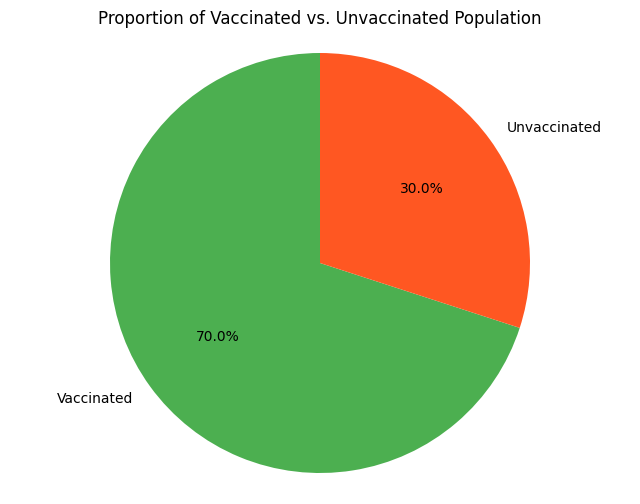

In [14]:
# Pie chart - Vaccinated | Unvaccinated Population
import matplotlib.pyplot as plt

# Example Data (Replace with actual data from your dataset)
data = {
    'Vaccinated': 70,
    'Unvaccinated': 30
}

# Create a pie chart
labels = ['Vaccinated', 'Unvaccinated']
sizes = [data['Vaccinated'], data['Unvaccinated']]
colors = ['#4CAF50', '#FF5722']  # Green for vaccinated, Red for unvaccinated

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Vaccinated vs. Unvaccinated Population')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()